In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. 간단한 스팸 메일 데이터셋 (텍스트와 레이블)
emails = [
    "긴급! 지금 바로 클릭하여 무료 경품을 받으세요!",  # 스팸
    "안녕하세요. 회의 일정을 확인해주세요.",      # 정상
    "광고: 놓치면 후회할 특별 할인!",          # 스팸
    "오늘 저녁 식사 같이 하실래요?",          # 정상
    "[중요] 계정 보안을 위해 비밀번호를 변경하세요.", # 정상 (하지만 스팸으로 오해받기 쉬움)
    "축하드립니다! 당신은 100만원 당첨되었습니다!",   # 스팸
    "업무 관련 문의드립니다.",                # 정상
    "최신 IT 트렌드와 뉴스 레터",              # 정상
    "놀라운 수익! 단기간에 부자 되세요!",        # 스팸
    "프로젝트 진행 상황 보고드립니다."          # 정상
]
labels = [1, 0, 1, 0, 0, 1, 0, 0, 1, 0]  # 1: 스팸, 0: 정상
# def custom_preprocessor(text):
#     text = text.lower()
#     return text.replace("document","")

# vectorizer = CountVectorizer(preprocessor=custom_preprocessor)

# 2. 텍스트 데이터를 숫자 벡터로 변환 (CountVectorizer)
# 각 단어의 빈도를 기준으로 벡터화합니다.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
# print(X.toarray())
# 3. 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 4. 나이브 베이즈 모델 학습 (MultinomialNB - 텍스트 데이터에 적합)
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 6. 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['정상', '스팸'])

print("정확도:", accuracy)
print("\n분류 보고서:\n", report)

# 7. 새로운 메일에 대한 예측
new_emails = [
    "새로운 보안 업데이트 알림",
    "대박! 90% 할인 행사!",
    "이번 주 팀 회의 안건"
]
new_X = vectorizer.transform(new_emails)
new_predictions = model.predict(new_X)

print("\n새로운 메일 예측:")
for email, prediction in zip(new_emails, new_predictions):
    print(f"메일: '{email}' -> 예측: {'스팸' if prediction == 1 else '정상'}")

정확도: 1.0

분류 보고서:
               precision    recall  f1-score   support

          정상       1.00      1.00      1.00         1
          스팸       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


새로운 메일 예측:
메일: '새로운 보안 업데이트 알림' -> 예측: 정상
메일: '대박! 90% 할인 행사!' -> 예측: 스팸
메일: '이번 주 팀 회의 안건' -> 예측: 정상


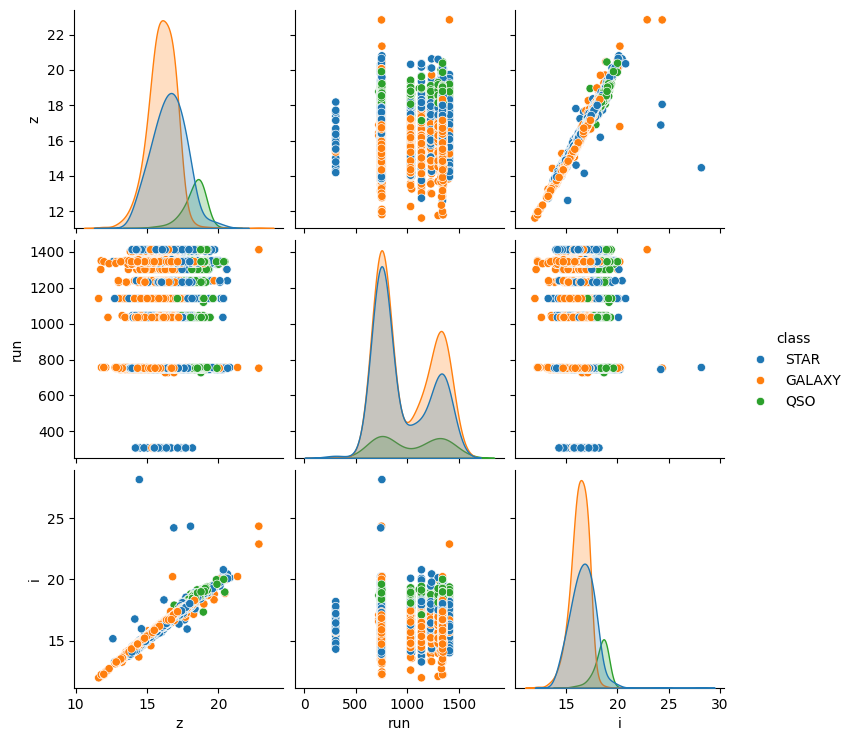

In [7]:
import pandas as pd

sky=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Skyserver.csv")
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(hue="class",data=sky[['z','run','i','class']],
                diag_kws={"bw_adjust": 2}, ) # KDE bandwidth 조정)
plt.show()

In [10]:
import numpy as np
features=list(sky.columns)
features.remove('class')

X=sky[features]
y=sky['class']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,y,stratify=y,test_size=0.3 , random_state=1)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
pred=gnb.fit(X_train,Y_train).predict(X_test)
print("Accuracy Score",gnb.score(X_test,Y_test))
proba= gnb.predict_proba(X_test)[[0,13,68]]
print(proba)
label= gnb.predict(X_test)[[0,13,68]]
print(label)

from sklearn.metrics import classification_report
pred=gnb.predict(X_test)
print(classification_report(Y_test,pred))

Accuracy Score 0.799
[[8.26737014e-01 4.43137039e-02 1.28949282e-01]
 [5.39851854e-05 9.64092748e-02 9.03536740e-01]
 [8.32868012e-01 4.48282737e-02 1.22303715e-01]]
['GALAXY' 'STAR' 'GALAXY']
              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

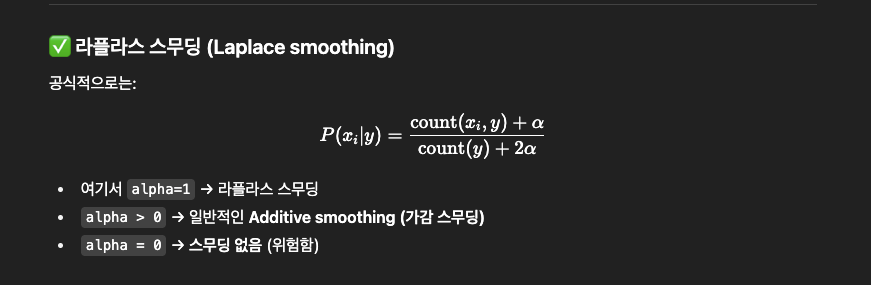

In [12]:
import pandas as pd
spam = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv",encoding="utf-8")
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
spam=spam[['v1','v2']]
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


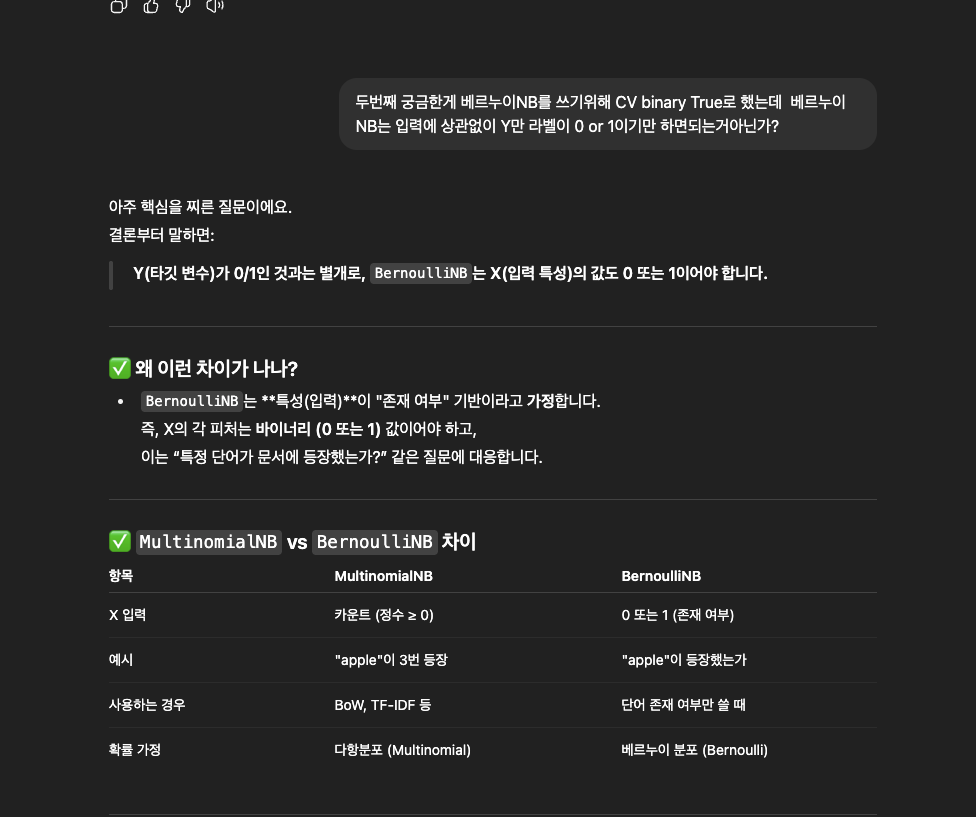

In [31]:
import numpy as np 
spam['label']=spam['v1'].map({'ham':0,'spam':1})
X=spam['v2']
y=spam['label']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)

# 각 단어가 문서에 등장했는지만을 판단하여,
# 0 또는 1로만 값을 설정하라는 뜻입니다.
# 즉, 단어의 출현 유무만 기록하고, 등장 횟수는 무시합니다.
# 베르누이 나이브는 이산형 0, 1 만 구분하는  분류기이므로, 등장 횟수가 아닌 등장여부만 체크되어야한다. 
X_train_cv=cv.fit_transform(X_train)
encoded_input=X_train_cv.toarray()
print(cv.inverse_transform(encoded_input[[0]]))
print(cv.inverse_transform(encoded_input[0].reshape(1,-1)))

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]
[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [32]:
print(cv.get_feature_names_out()[1000:1010])

['at' 'ate' 'athletic' 'athome' 'atlanta' 'atlast' 'atm' 'attach'
 'attached' 'attack']


In [33]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_cv,Y_train)

BernoulliNB()

In [35]:
X_test_cv=cv.transform(X_test)
pred=bnb.predict(X_test_cv)

from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,pred)
print(acc)
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [38]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("https://raw.githubusercontent.com/ADPClass/ADP_book_ver01/main/data/MovieReviews.csv")
df.head()
# df.isna().sum()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X=df['review']
y=df['label']
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3, stratify=y)
cv=CountVectorizer(binary=False)
X_train_cv=cv.fit_transform(X_train)


In [41]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(X_train_cv,Y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import accuracy_score,classification_report
pred=mnb.predict(cv.transform(X_test))
print(accuracy_score(Y_test,pred))
print(classification_report(Y_test,pred))

0.8326666666666667
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1495
           1       0.86      0.79      0.83      1505

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

